<a href="https://colab.research.google.com/github/arlenkim/study/blob/main/55C3_US_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/drive/MyDrive/Colab Notebooks/11-15.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/11-15.ipynb
/content/drive/MyDrive/Colab Notebooks/b52_Regression.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/wine.ipynb
/content/drive/MyDrive/Colab Notebooks/mushroom.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/car_evaluation.csv
/content/drive/MyDrive/Colab Notebooks/car_evaluation.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/55C3_US_3rd_data.csv
/content/drive/MyDrive/Colab Notebooks/b56_DT_RF_Boost_Reg.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb의 사본 (1)
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb
/content/drive/MyDrive/Colab Notebooks/65C3_US_RFR.ipynb
/content/drive/MyDrive/Colab Notebooks/mushroom.ipynb


In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation

In [130]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,898 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [273]:
# DATA 다운
df = pd.read_csv("https://raw.githubusercontent.com/arlenkim/study/main/55C3_US_3rd_data_new2.csv",encoding='euc-kr',header=1)

In [323]:
df2 = df.drop(['작업일자', '순번','모델번호', '모델코드', '모델이름','최종공정','선택','탱크온도', '호스온도', '노즐온도','작업일시','작업일시.1', '작업일시.2','작업횟수','작업일시.3', '작업횟수.1','작업일시.4', '작업일시.5','작업일시.6', '박스바코드',
               '1:사용여부','1:평균출력2','1:평균출력3',
               '2:사용여부','2:평균출력2','2:평균출력3',
               '3:사용여부','3:평균출력2','3:평균출력3',
               '4:사용여부','4:평균출력2','4:평균출력3',
               '5:사용여부','5:평균출력2','5:평균출력3',
               '6:사용여부','6:평균출력2','6:평균출력3',
               '7:사용여부','7:평균출력2','7:평균출력3',
               '8:사용여부','8:평균출력2','8:평균출력3',
               '9:사용여부','9:평균출력2','9:평균출력3',
               '10:사용여부','10:평균출력2','10:평균출력3',
               '11:사용여부','11:평균출력2','11:평균출력3',
               '12:사용여부','12:평균출력2','12:평균출력3',
               '13:사용여부','13:평균출력2','13:평균출력3',
               '14:사용여부','14:평균출력2','14:평균출력3',
               '15:사용여부','15:평균출력2','15:평균출력3',
               '16:사용여부','16:평균출력2','16:평균출력3',
               '17:사용여부','17:평균출력2','17:평균출력3',
               '18:사용여부','18:평균출력2','18:평균출력3',
               '19:사용여부','19:평균출력2','19:평균출력3',
               '20:사용여부','20:평균출력2','20:평균출력3',
               '21:사용여부','21:평균출력2','21:평균출력3',
               '22:사용여부','22:평균출력2','22:평균출력3',
               '23:사용여부','23:평균출력2','23:평균출력3',
               '24:사용여부','24:평균출력2','24:평균출력3',
               '1:압력', '1:시간', '1:진폭', '1:주파수',
               '2:압력', '2:시간', '2:진폭', '2:주파수',
               '3:압력', '3:시간', '3:진폭', '3:주파수',
               '4:압력', '4:시간', '4:진폭', '4:주파수',
               '5:압력', '5:시간', '5:진폭', '5:주파수',
               '6:압력', '6:시간', '6:진폭', '6:주파수',
               '7:압력', '7:시간', '7:진폭', '7:주파수',
               '8:압력', '8:시간', '8:진폭', '8:주파수',
               '9:압력', '9:시간', '9:진폭', '9:주파수',
                 '10:압력', '10:시간', '10:진폭', '10:주파수',
                 '11:압력', '11:시간', '11:진폭', '11:주파수',
                 '12:압력', '12:시간', '12:진폭', '12:주파수',
                 '13:압력', '13:시간', '13:진폭', '13:주파수',
                 '14:압력', '14:시간', '14:진폭', '14:주파수',
                 '15:압력', '15:시간', '15:진폭', '15:주파수',
                 '16:압력', '16:시간', '16:진폭', '16:주파수',
                 '17:압력', '17:시간', '17:진폭', '17:주파수',
                 '18:압력', '18:시간', '18:진폭', '18:주파수',
                 '19:압력', '19:시간', '19:진폭', '19:주파수',
                 '20:압력', '20:시간', '20:진폭', '20:주파수',
                 '21:압력', '21:시간', '21:진폭', '21:주파수',
                 '22:압력', '22:시간', '22:진폭', '22:주파수',
                 '23:압력', '23:시간', '23:진폭', '23:주파수',
                 '24:압력', '24:시간', '24:진폭', '24:주파수',               
               ], axis=1)

In [238]:
df2.isnull().sum()

라인      0
생성일시    0
바코드     0
1:압력    0
1:시간    0
       ..
판정.1    0
좌측      0
판정.2    0
우측      0
판정.3    0
Length: 180, dtype: int64

In [94]:
#df2 = df2.replace(0, np.NaN)

In [95]:
#df3 =df2.dropna(axis=0) 
#df3.shape

(2512, 84)

In [142]:
#df3.isnull().sum()

In [111]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 60

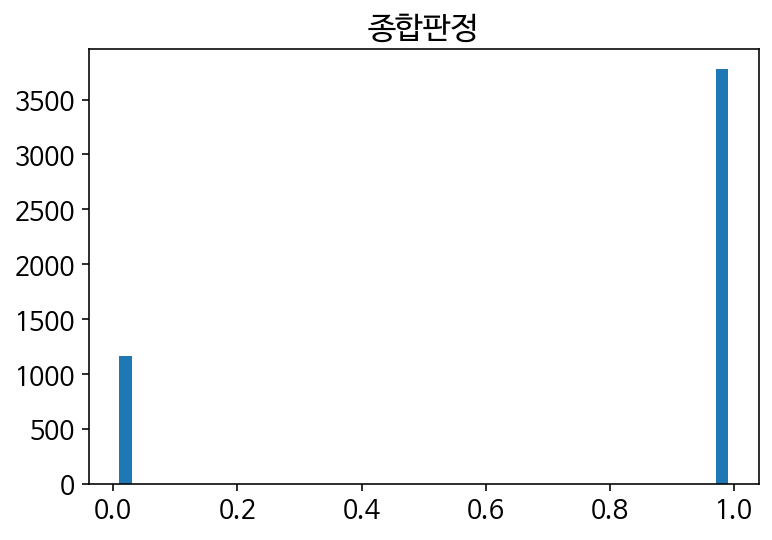

In [364]:
for col in ["종합판정"]:
    plt.hist(df2[col], bins=25, rwidth=0.5)
    plt.title(col)
    plt.show()

In [458]:
## 훈련 데이터와 검증 데이터 준비

features = df2.columns.difference(["라인", "생성일시", "바코드","종합판정", "판정", "하부", "판정.1", "좌측", "판정.2", "우측", "판정.3","상부",
       '1:에너지1', '1:최대출력', '1:평균출력1',
       '2:에너지1', '2:최대출력', '2:평균출력1',
       '3:에너지1', '3:최대출력', '3:평균출력1',
       '4:에너지1', '4:최대출력', '4:평균출력1',
       '5:에너지1', '5:최대출력', '5:평균출력1',
       '6:에너지1', '6:최대출력', '6:평균출력1',
       '7:에너지1', '7:최대출력', '7:평균출력1',
       '8:에너지', '8:최대출력', '8:평균출력1',
       '9:에너지', '9:최대출력', '9:평균출력1',
       '10:에너지', '10:최대출력', '10:평균출력1',
       '11:에너지', '11:최대출력', '11:평균출력1',
       '12:에너지', '12:최대출력', '12:평균출력1',
       '13:에너지', '13:최대출력', '13:평균출력1',
       '14:에너지', '14:최대출력', '14:평균출력1',
       '15:에너지1', '15:최대출력', '15:평균출력1',
       '16:에너지1', '16:최대출력', '16:평균출력1',
       '17:에너지1', '17:최대출력', '17:평균출력1',
       '18:에너지1', '18:최대출력', '18:평균출력1',
       '19:에너지1', '19:최대출력', '19:평균출력1',
       '20:에너지1', '20:최대출력', '20:평균출력1',
       '21:에너지1', '21:최대출력', '21:평균출력1',
       '22:에너지1', '22:최대출력', '22:평균출력1',
       '23:에너지1', '23:최대출력', '23:평균출력1',
       '24:에너지1', '24:최대출력', '24:평균출력1',
      ])
X = df2[features]
y = df2["종합판정"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=9, shuffle=True)

In [459]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1161, 3775]))

In [460]:
X_train.shape, y_train.shape, X_test.shape

((3948, 17), (3948,), (988, 17))

In [461]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([ 915, 3033]))

In [462]:
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, RandomOverSampler
smote = SMOTE(random_state=9)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
X_train_over.shape, y_train_over.shape

((6066, 17), (6066,))

In [452]:
np.unique(y_train_over, return_counts=True)

(array([0, 1]), array([3033, 3033]))

In [433]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 20)

In [434]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [392]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

In [475]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train_over, y_train_over)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.8721


0.857


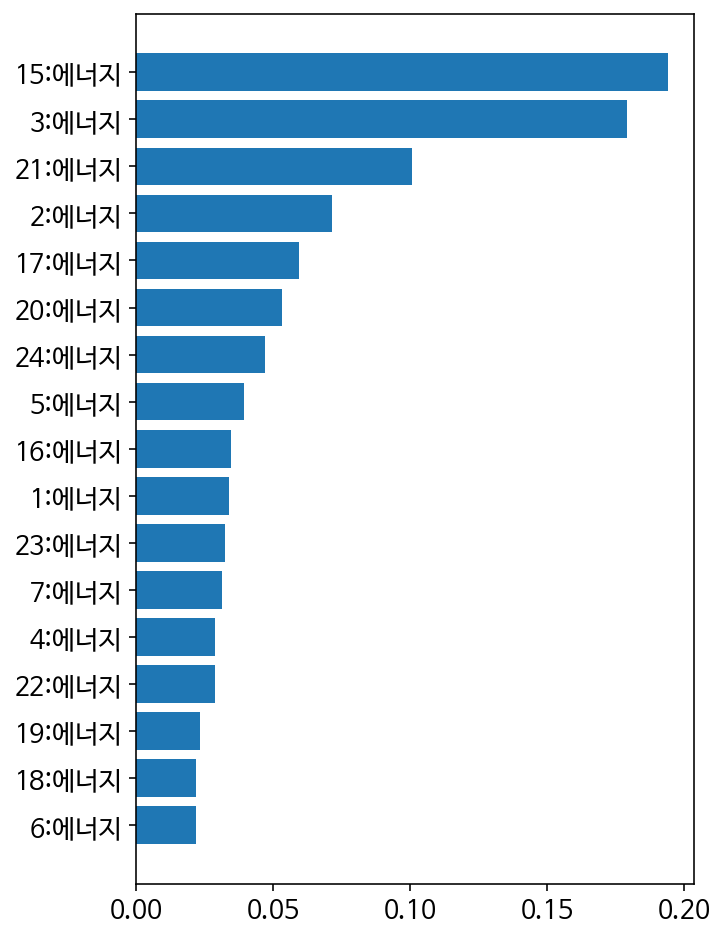

In [490]:
## 랜덤 포레스트 모델 성능 확인

dtc = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                max_features='auto',
                                n_jobs = -1)
dtc.fit(X_train_over, y_train_over) 
print(dtc.score(X_test, y_test).round(3)) 

plot_feature_weight(X.columns, dtc.feature_importances_)

In [489]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

y_pred = dtc.predict(X_test)
show_clf_result(y_test, y_pred)

[[154  92]
 [ 49 693]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       246
           1       0.88      0.93      0.91       742

    accuracy                           0.86       988
   macro avg       0.82      0.78      0.80       988
weighted avg       0.85      0.86      0.85       988



In [380]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve,precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, RandomOverSampler

In [465]:
result = []

In [466]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
show_clf_result(y_test, y_pred)

result.append(('logistic-regression', precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
result

[[122 124]
 [ 30 712]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.61       246
           1       0.85      0.96      0.90       742

    accuracy                           0.84       988
   macro avg       0.83      0.73      0.76       988
weighted avg       0.84      0.84      0.83       988



[('logistic-regression', 0.8516746411483254, 0.9595687331536388)]

In [467]:
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

show_clf_result(y_test, y_pred)
result.append(('random-forest',
    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
result

[[142 104]
 [ 21 721]]
              precision    recall  f1-score   support

           0       0.87      0.58      0.69       246
           1       0.87      0.97      0.92       742

    accuracy                           0.87       988
   macro avg       0.87      0.77      0.81       988
weighted avg       0.87      0.87      0.86       988



[('logistic-regression', 0.8516746411483254, 0.9595687331536388),
 ('random-forest', 0.8739393939393939, 0.9716981132075472)]

In [410]:
lgbm_clf = LGBMClassifier(n_estimators=100,boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
show_clf_result(y_test, y_pred)

result.append(('lightgbm',
    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
result

[[144 102]
 [ 18 724]]
              precision    recall  f1-score   support

           0       0.89      0.59      0.71       246
           1       0.88      0.98      0.92       742

    accuracy                           0.88       988
   macro avg       0.88      0.78      0.81       988
weighted avg       0.88      0.88      0.87       988



[('logistic-regression', 0.859880239520958, 0.967654986522911),
 ('random-forest', 0.8708133971291866, 0.9811320754716981),
 ('lightgbm', 0.8765133171912833, 0.9757412398921833)]

In [411]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_over, y_train_over)
y_pred = lr_clf.predict(X_test)
show_clf_result(y_test, y_pred)

result.append(('log-reg-SMOTE',
    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
result

[[169  77]
 [162 580]]
              precision    recall  f1-score   support

           0       0.51      0.69      0.59       246
           1       0.88      0.78      0.83       742

    accuracy                           0.76       988
   macro avg       0.70      0.73      0.71       988
weighted avg       0.79      0.76      0.77       988



[('logistic-regression', 0.859880239520958, 0.967654986522911),
 ('random-forest', 0.8708133971291866, 0.9811320754716981),
 ('lightgbm', 0.8765133171912833, 0.9757412398921833),
 ('log-reg-SMOTE', 0.882800608828006, 0.7816711590296496)]

In [412]:
lgbm_clf.fit(X_train_over, y_train_over)
y_pred = lgbm_clf.predict(X_test)
show_clf_result(y_test, y_pred)

result.append(('lgbm-SMOTE',
    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
result

[[163  83]
 [ 60 682]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.70       246
           1       0.89      0.92      0.91       742

    accuracy                           0.86       988
   macro avg       0.81      0.79      0.80       988
weighted avg       0.85      0.86      0.85       988



[('logistic-regression', 0.859880239520958, 0.967654986522911),
 ('random-forest', 0.8708133971291866, 0.9811320754716981),
 ('lightgbm', 0.8765133171912833, 0.9757412398921833),
 ('log-reg-SMOTE', 0.882800608828006, 0.7816711590296496),
 ('lgbm-SMOTE', 0.8915032679738563, 0.9191374663072777)]

In [166]:
|## 결정 트리를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    dtr = DecisionTreeRegressor(max_depth=depth) 
    dtr.fit(X_train, y_train) 
    res.append((depth, dtr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

SyntaxError: ignored

In [ ]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [ ]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

Max Error:  2.955
Mean Absolute Error:  0.502
Root Mean Squared Error:  0.706
R-Squared:  -0.25


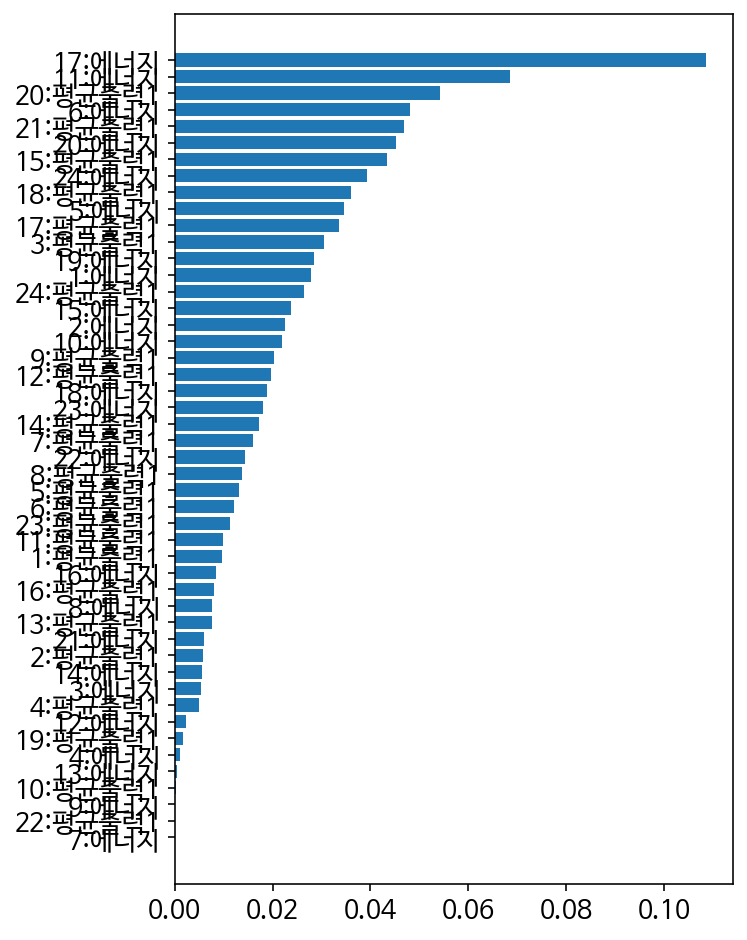

In [ ]:
## 결정 트리 모델 성능 확인

dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, dtr.feature_importances_)

depth:  21 , R-squared:  0.215


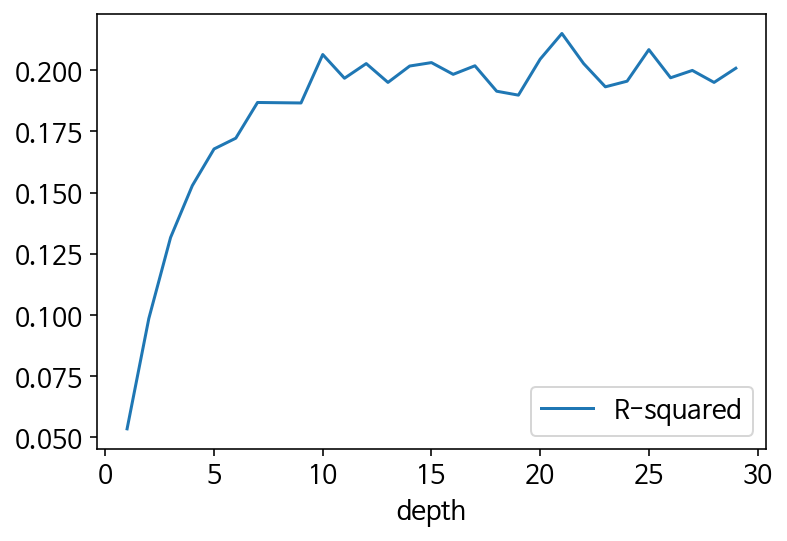

In [ ]:
## 랜덤 포레스트를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y_train) 
    res.append((depth, rfr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.063
Mean Absolute Error:  0.424
Root Mean Squared Error:  0.565
R-Squared:  0.201


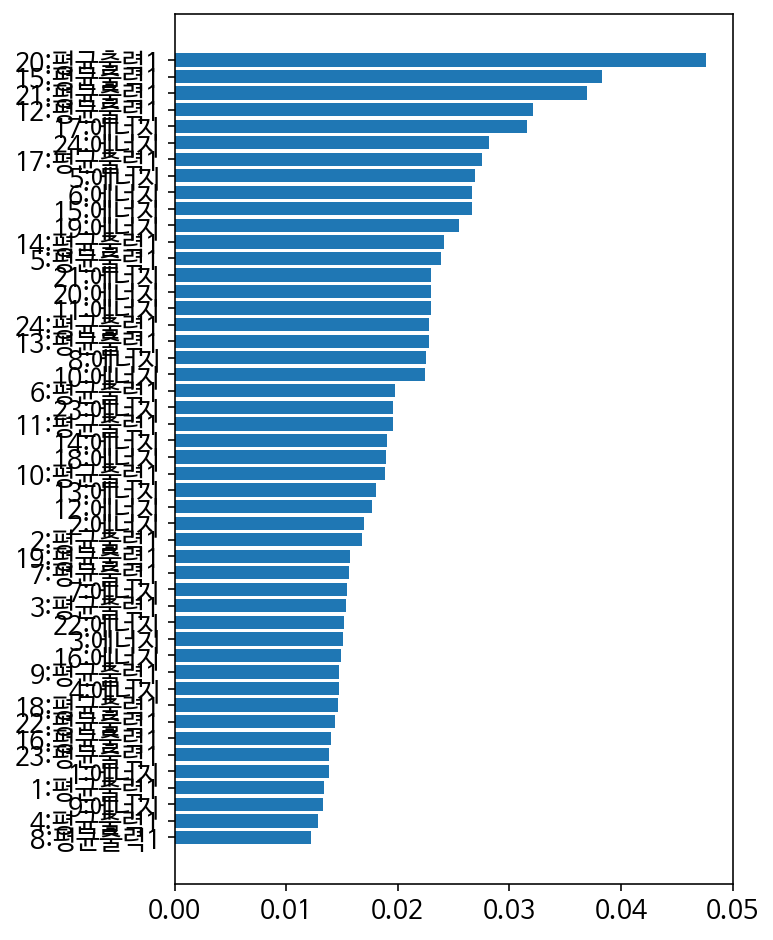

In [ ]:
## 랜덤 포레스트 모델 성능 확인

rfr = RandomForestRegressor(max_depth=18)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

depth:  5 , R-squared:  0.2259


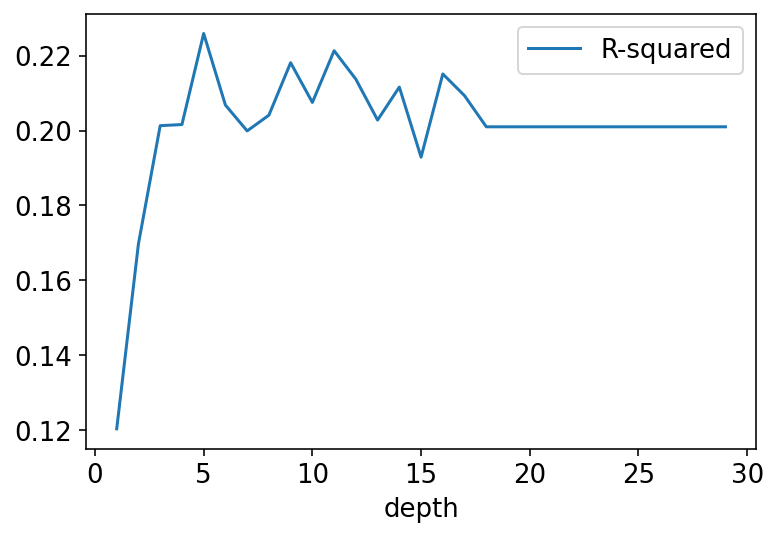

In [ ]:
## LightGBM 부스팅 모델을 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    lgbm_r = LGBMRegressor(max_depth=depth, num_leaves=32) 
    lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
    res.append((depth, lgbm_r.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  1.938
Mean Absolute Error:  0.424
Root Mean Squared Error:  0.565
R-Squared:  0.201


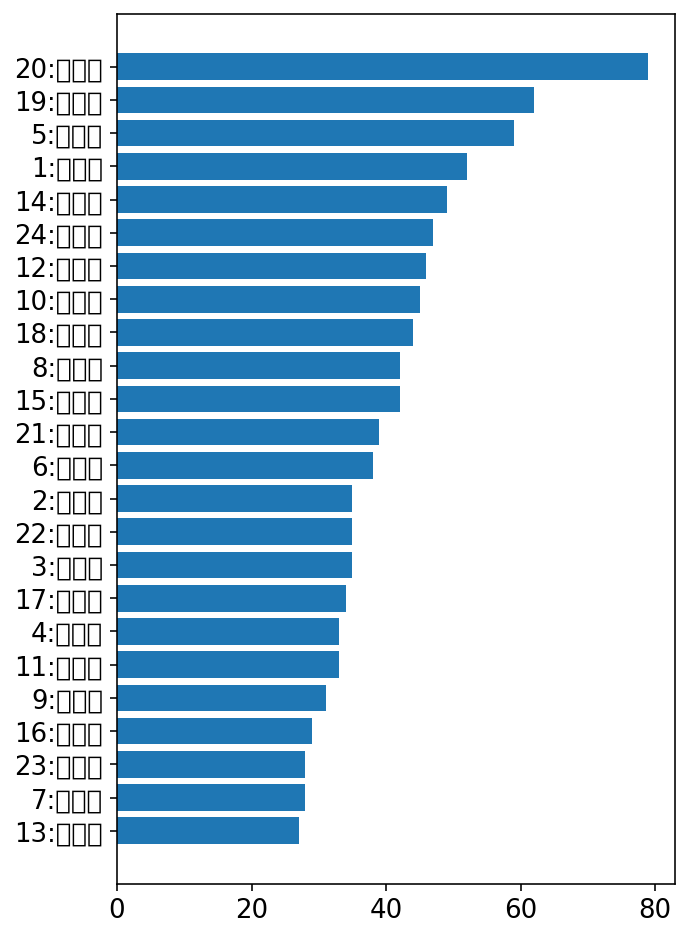

In [ ]:
## 부스팅 모델 성능 확인

lgbm_r = LGBMRegressor(max_depth=19, num_leaves=32)
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, lgbm_r.feature_importances_)

In [ ]:
y_test

2302   -1.15
204    -1.63
2503   -1.30
2523   -1.23
1528   -1.95
        ... 
1464   -1.22
304    -3.19
2419    0.01
224    -0.93
1095   -1.38
Name: 상부, Length: 1077, dtype: float64

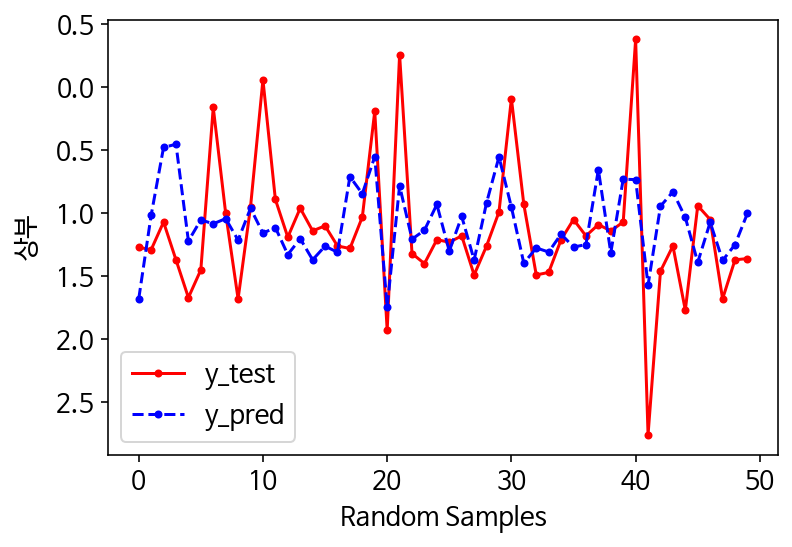

In [ ]:
## 회귀 예측과 실제값 샘플 비교하기

def plot_reg_result(y_test, y_pred, N=50):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("상부")
    plt.show()

y_pred = lgbm_r.predict(X_test)
plot_reg_result(y_test, y_pred)